In [36]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize
import cv2
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Patch
from matplotlib.colors import BoundaryNorm
from PIL import Image
import random

In [37]:
image_path = '9.png'
image = io.imread(image_path)
print("Image shape:", image.shape)

Image shape: (389, 389, 4)


In [38]:
image_path = '9.png'
image = io.imread(image_path)

In [39]:
if image.ndim == 3:
    if image.shape[2] == 4:
        image = image[:, :, :3]
    image = color.rgb2gray(image)

new_size = (28, 28)
image = transform.resize(image, new_size, preserve_range=True)

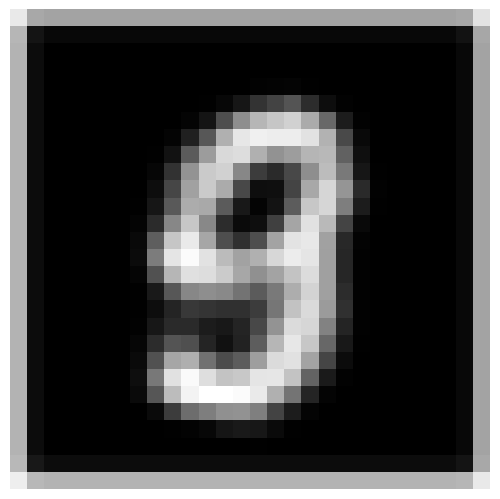

In [40]:
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

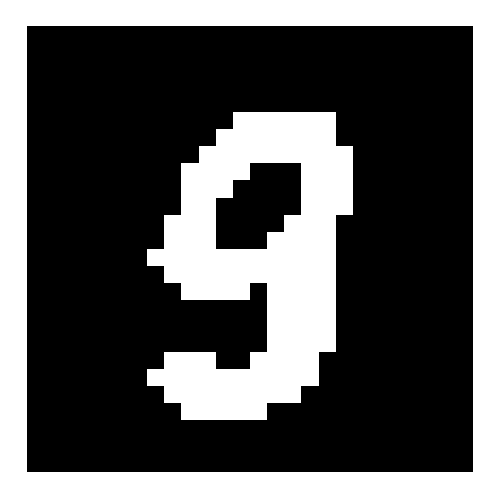

In [41]:
threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

plt.imshow(binary_image, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

In [42]:
skeleton = skeletonize(binary_image)

In [43]:
skeleton[0, :] = 0
skeleton[-1, :] = 0
skeleton[:, 0] = 0
skeleton[:, -1] = 0

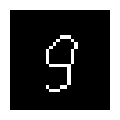

In [44]:
plt.figure(figsize=(1, 1))

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig('skeleton_image.png', format='png', dpi=28)

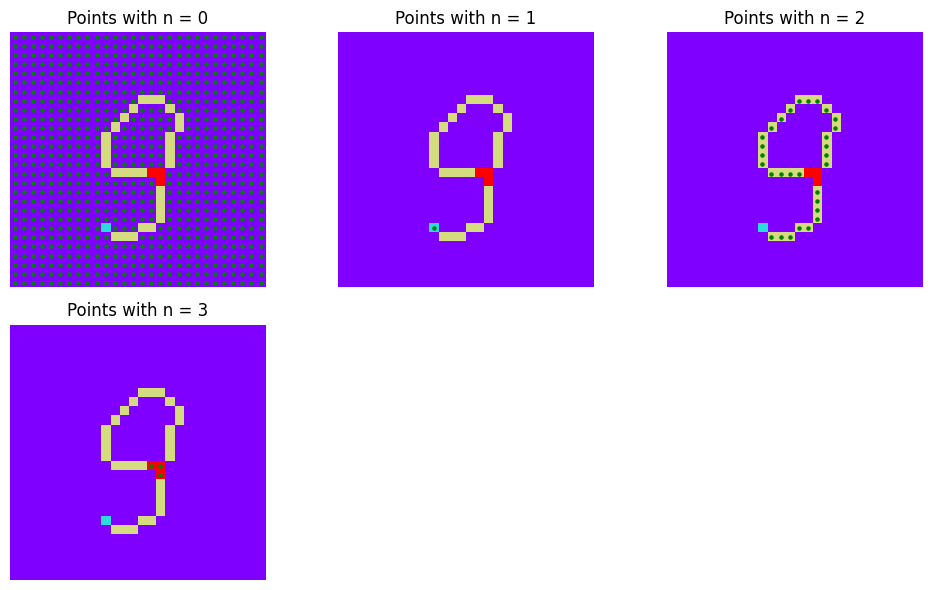

In [45]:
image = Image.open('skeleton_image.png').convert('L')

image_array = np.array(image) > 128

def calculate_n_value(image_array, x, y):
    n = 0
    for i in range(x - 1, x + 2):
        for j in range(y - 1, y + 2):
            if (i != x or j != y) and 0 <= i < image_array.shape[0] and 0 <= j < image_array.shape[1] and image_array[i][j]:
                n += 1
    return n

n_image = np.zeros_like(image_array, dtype=np.uint8)

for x in range(image_array.shape[0]):
    for y in range(image_array.shape[1]):
        if image_array[x][y]:
            n = calculate_n_value(image_array, x, y)
            n_image[x][y] = n

unique_n_values = np.unique(n_image)

points_by_n_value = {n: [] for n in unique_n_values}

for x in range(image_array.shape[0]):
    for y in range(image_array.shape[1]):
        n = n_image[x][y]
        points_by_n_value[n].append((y, x))

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i, (n, points) in enumerate(points_by_n_value.items()):
    ax = axs[i]
    ax.imshow(n_image, cmap='rainbow')
    ax.scatter(*zip(*points), c='green', s=5)
    ax.set_title(f"Points with n = {n}")
    ax.axis('off')

for i in range(len(unique_n_values), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

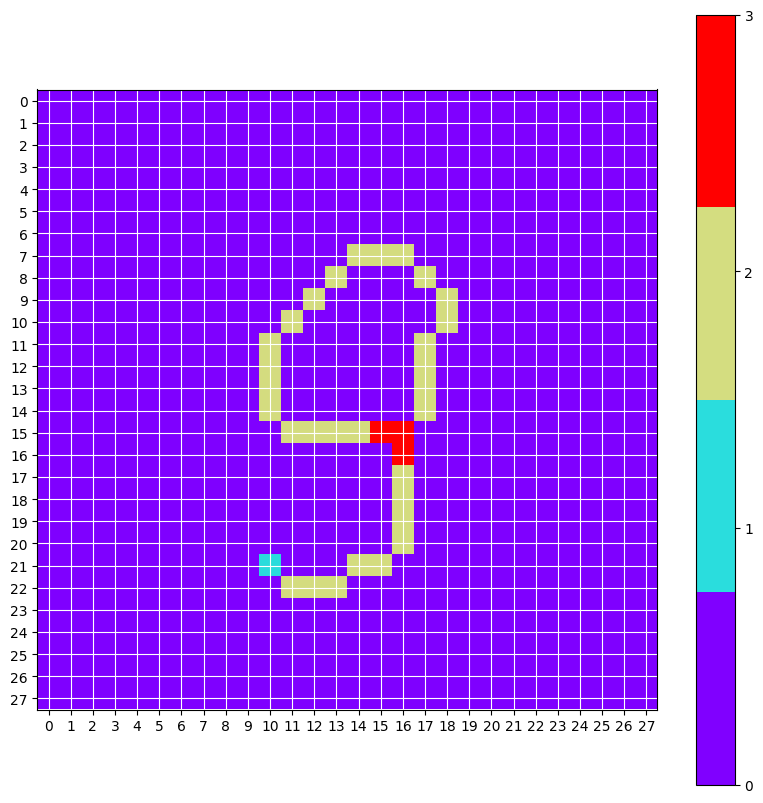

In [46]:
cmap = plt.get_cmap('rainbow', np.max(n_image) - np.min(n_image) + 1)
plt.figure(figsize=(10, 10))
plt.imshow(n_image, cmap=cmap, interpolation='nearest')

plt.xticks(range(28), labels=range(28))
plt.yticks(range(28), labels=range(28))

plt.grid(True, color='white')

colorbar = plt.colorbar()
colorbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [50]:
def find_starting_point(image, visited):
  x = random.choice(points_by_n_value[1])
  return (x[1],x[0])
find_starting_point(n_image,[])

def find_neighbors(image, p):
    neighbors = []

    if image[p[0]][p[1]] == 0:
        return []

    else:
        for i in range(p[0] - 1, p[0] + 2):
            for j in range(p[1] - 1, p[1] + 2):
                if image[i][j] > 0:
                    neighbors.append((i, j))

    neighbors.remove(p)

    neighbors = sorted(neighbors, key=lambda x: calculate_n_value(image, x[0], x[1]))

    return neighbors

def dfs(image):
  path = []
  visited = []
  iteration = 0
  sp = find_starting_point(image, visited)
  print('sp: ',sp)
  print("\n")
  visited.append(sp)

  print("visited points:", visited)

  while visited:
    current_node = visited.pop()
    print(f'Iteration {iteration}:\ncurrent point selected:', current_node)
    iteration += 1

    neighbors = find_neighbors(image, current_node)
    print('before cleaning neighbors:',neighbors)

    for n in range(1, 6):
        if any(neighbor in points_by_n_value.get(n, []) for neighbor in neighbors):
            print(f'Neighbor(s) {neighbors} have n value {n}')

    neighbors = list(set(neighbors) - set(path))
    print('after cleaning neighbors:', neighbors)  #calculate the value of neighbours
    if not neighbors:
      continue

    path.append(current_node)
    visited.extend(neighbors)
    print('queued up point choices: ',neighbors)
    print('\n')
  return path

print('FINAL PATH: ',dfs(n_image))

sp:  (21, 10)


visited points: [(21, 10)]
Iteration 0:
current point selected: (21, 10)
before cleaning neighbors: [(22, 11)]
after cleaning neighbors: [(22, 11)]
queued up point choices:  [(22, 11)]


Iteration 1:
current point selected: (22, 11)
before cleaning neighbors: [(21, 10), (22, 12)]
after cleaning neighbors: [(22, 12)]
queued up point choices:  [(22, 12)]


Iteration 2:
current point selected: (22, 12)
before cleaning neighbors: [(22, 11), (22, 13)]
after cleaning neighbors: [(22, 13)]
queued up point choices:  [(22, 13)]


Iteration 3:
current point selected: (22, 13)
before cleaning neighbors: [(21, 14), (22, 12)]
after cleaning neighbors: [(21, 14)]
queued up point choices:  [(21, 14)]


Iteration 4:
current point selected: (21, 14)
before cleaning neighbors: [(21, 15), (22, 13)]
after cleaning neighbors: [(21, 15)]
queued up point choices:  [(21, 15)]


Iteration 5:
current point selected: (21, 15)
before cleaning neighbors: [(20, 16), (21, 14)]
after cleaning neighbor

sp:  (21, 10)


visited points: [(21, 10)]
Iteration 0:
current point selected: (21, 10)
before cleaning neighbors: [(22, 11)]
after cleaning neighbors: [(22, 11)]
queued up point choices:  [(22, 11)]


Iteration 1:
current point selected: (22, 11)
before cleaning neighbors: [(21, 10), (22, 12)]
after cleaning neighbors: [(22, 12)]
queued up point choices:  [(22, 12)]


Iteration 2:
current point selected: (22, 12)
before cleaning neighbors: [(22, 11), (22, 13)]
after cleaning neighbors: [(22, 13)]
queued up point choices:  [(22, 13)]


Iteration 3:
current point selected: (22, 13)
before cleaning neighbors: [(21, 14), (22, 12)]
after cleaning neighbors: [(21, 14)]
queued up point choices:  [(21, 14)]


Iteration 4:
current point selected: (21, 14)
before cleaning neighbors: [(21, 15), (22, 13)]
after cleaning neighbors: [(21, 15)]
queued up point choices:  [(21, 15)]


Iteration 5:
current point selected: (21, 15)
before cleaning neighbors: [(20, 16), (21, 14)]
after cleaning neighbor

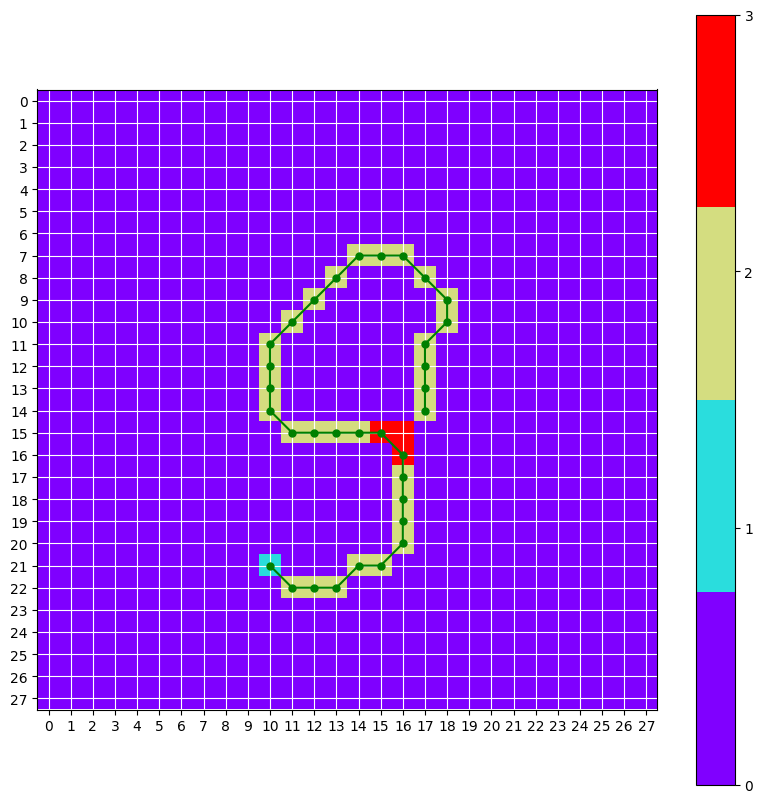

In [51]:
path = dfs(n_image)

cmap = plt.get_cmap('rainbow', np.max(n_image) - np.min(n_image) + 1)
plt.figure(figsize=(10, 10))

plt.imshow(n_image, cmap=cmap)
path_x, path_y = zip(*path)
plt.plot(path_y, path_x, marker='o', markersize=5, color='green')

plt.xticks(range(28), labels=range(28))
plt.yticks(range(28), labels=range(28))

plt.grid(True, color='white')

colorbar = plt.colorbar()
colorbar.ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [49]:
# path = dfs(n_image)

# n_values = np.unique(n_image)
# cmap = plt.get_cmap('rainbow', len(n_values))

# norm = BoundaryNorm(np.arange(len(n_values) + 1) - 0.5, len(n_values))

# plt.figure(figsize=(10, 10))
# plt.scatter(*zip(*path), c='white', s=10)
# img = plt.imshow(n_image, cmap=cmap, interpolation='nearest', norm=norm)

# plt.xticks(range(28), labels=range(28))
# plt.yticks(range(28), labels=range(28))

# plt.grid(True, color='white')

# legend_colors = [cmap(i) for i in range(len(n_values))]
# color_patches = [Patch(color=color, label=f'n = {n}') for n, color in zip(n_values, legend_colors)]
# plt.legend(handles=color_patches, title='n values', loc='upper right')

# for i in range(len(path) - 1):
#     x1, y1 = path[i]
#     x2, y2 = path[i + 1]
#     dx = x2 - x1
#     dy = y2 - y1
#     plt.arrow(x1, y1, dx, dy, head_width=0.2, head_length=0.2, fc='red', ec='blue')

# plt.show()

# print("DFS Path:")
# for x, y in path:
#     print(f"({x}, {y}) ->", end=" ")
# print("End")
